In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
dataset=pd.read_csv("Upper Confidence Bound Facebook.csv")

In [15]:
import math
T = 200
num_ads = 10
ads_selected = []
numbers_of_selections = [0] * num_ads
sums_of_rewards = [0] * num_ads
total_reward = 0

for n in range(0, T):
  ad = 0
  max_upper_bound = 0
  for i in range(0, num_ads):
    if (numbers_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward
  

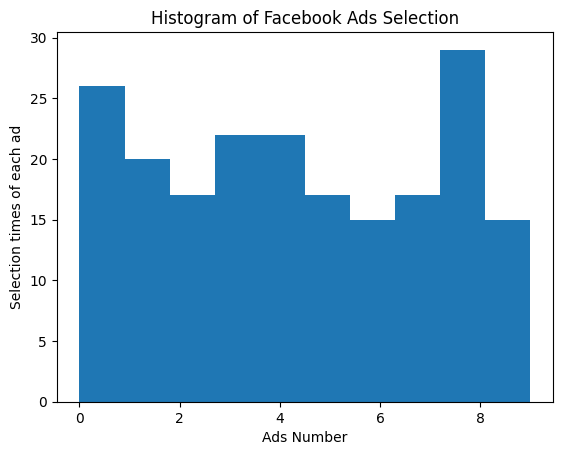

In [16]:
#CREATE HISTOGRAM VISUALIZATION 

plt.hist(ads_selected)
plt.title('Histogram of Facebook Ads Selection')
plt.xlabel('Ads Number')
plt.ylabel('Selection times of each ad')
plt.show()